# Sulcal morphology pipeline

We want to measure morphological properties of small and variable sulci. To do so, we'll need to  
(1) process the raw T1 scan in FreeSurfer,  
(2) manually identify and label the sulci, and  
(3) use FreeSurfer to extract anatomical properties from our sulcal labels.

The full pipeline is outlined below:

<img src="images/sulcmorph-pipeline.png" width="900" />


The first step is already completed (because it takes a few hours per scan): running the _recon-all_ command in FreeSurfer. 

FreeSurfer (FS) is an open-source software package for neuroimaging (structural MRI) analysis and visualization<sup>[1]</sup>. [_Recon-all_](https://surfer.nmr.mgh.harvard.edu/fswiki/recon-all) performs the FS cortical reconstruction process, which converts the 3D cortical volume into 2D surfaces that it uses to compute various anatomical properties (that we'll use in step 3)<sup>[2]</sup>. Here's an overview of the steps:


<img src="images/FS_reconall.png" width="600" />
<img src="images/FS_reconall-output.png" width="600" />

We'll be labeling sulci on the *inflated* surface, because the inflation allows us to see the sulci (in red). We use the *pial* (the one that looks like a regular brain) as a reference, because sometimes the inflated one distorts the way the sulci look.


# Labeling sulci

The next step is to manually identify and label the sulci. We first do this on screenshots of each hemisphere and then enter finalized labels into FS to extract morphological properties from each label.

For this demo, we'll be labeling sulci in medial parietal cortex (MPC). There is considerable individual variability in the number and location of sulci: there are 8 sulci that will be present in all hemispheres ("consistent"), and 4 variable or "inconsistent" sulci that not every hemisphere will have.

<img src="images/MPC_sulci.png" width="900" />



Head to [this link](https://docs.google.com/presentation/d/1bP4_0ZPlcH8Zn5mYyScCcsP61hnBiWtJg36Zq9l0v6k/edit?usp=sharing) to see some examples of labeled hemispheres and atlases we use for reference. Pick a few slides each to label (directly on the slide).


Once we've labeled the sulci on the screenshots and confirmed they're correct, we can enter them into FS.  
For this step you need to log into the Neuro Cluster; talk to Samira.   
<mark>_[probably will run through the process once myself to show them like I do w/ RAs, & then will log them into the cluster in groups/pairs(??) so we don't have to log in too many times & they can work together -- depending on the number of students]_</mark>

Instructions for entering sulcal labels into FS are [here](https://sites.google.com/view/cnl-wiki/home/how-tos/freesufer/labels-in-freesurfer?authuser=0) (skip to step 5). 

# Extracting anatomical properties from sulcal labels & analyzing them

Running the [_mris_anatomical_stats_](https://surfer.nmr.mgh.harvard.edu/fswiki/mris_anatomical_stats) function in FS computes anatomical properties (surface area, gray matter volume, cortical thickness, etc.) for a set of labels (if specified), in this case the sulcal labels you just created. This can take some time, so you can skip this step for this demo. 

Now you can view the final output that contains the morphological metrics for the sulci you labeled. Run the code cells below to load in the data -- some basic plots and analyses are provided, but feel free to play around with it on your own too!

<mark>_[I kept this very simple but lmk if you think we should add more]_</mark>




In [53]:
## load packages ##
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns

In [54]:
# load in your data: morphological metrics for your sulcal labels
df = pd.read_csv('demo-30CN_MPC.csv')
df.head()

,group,sub,hemi,label,vertices,total_surface_area_(mm^2),total_gray_matter_volume_(mm^3),cortical_thickness_mean,cortical_thickness_std,rectified_mean_curvature,rectified_Gaussian_curvature,folding_index,intrinsic_curvature_index,sulcal_depth_mean,sulcal_depth_max,sulcal_depth_mean_pct,sulc_type,label_orig,sulcal_depth_mm,area
0,CN,007_S_4488,lh,pos,1764.0,1204.0,2277.0,2.232,0.342,0.111,0.022,9.0,1.7,5.188825,13.898811,0.309191,primary/secondary,POS,21.108100,PMC
1,CN,007_S_4488,lh,prculs,464.0,329.0,579.0,1.957,0.291,0.102,0.012,2.0,0.3,3.194825,10.882976,0.190373,primary/secondary,prculs,16.783466,PMC
2,CN,007_S_4488,lh,prcus-p,415.0,284.0,574.0,2.258,0.338,0.115,0.021,2.0,0.4,4.195996,9.133797,0.250030,primary/secondary,prcus1,12.845846,PMC
3,CN,007_S_4488,lh,prcus-i,306.0,227.0,364.0,1.857,0.335,0.134,0.019,3.0,0.3,-1.208224,2.093879,-0.071995,primary/secondary,prcus2,8.776521,PMC
4,CN,007_S_4488,lh,prcus-a,546.0,400.0,725.0,2.035,0.386,0.120,0.017,4.0,0.5,3.230111,8.453441,0.192475,primary/secondary,prcus3,11.436054,PMC


In [72]:
# function to make violin plots, using Seaborn

def violinplot(df, metric, metric_name):
    sulci = ['pos', 'prculs', 'prcus-p', 'prcus-i', 'prcus-a', 
             'spls', 'mcgs','sspls', 'ifrms', 'icgs-p']

    fig, axes = plt.subplots(1, 2, sharey=True, figsize=(15, 4))
    fig.suptitle(metric+' by sulcal type and hemisphere');

    axes[0].set_title('left hem.')
    sns.violinplot(ax=axes[0],
                   x="label", y=metric, 
                   hue="sulc_type", order=sulci,
                   data=df[df['hemi']=='lh']);
    axes[1].set_title('right hem.')
    axes[1].set_ylabel('');
    sns.violinplot(ax=axes[1],
                   x="label", y=metric, 
                   hue="sulc_type", order=sulci,
                   data=df[df['hemi']=='rh']);


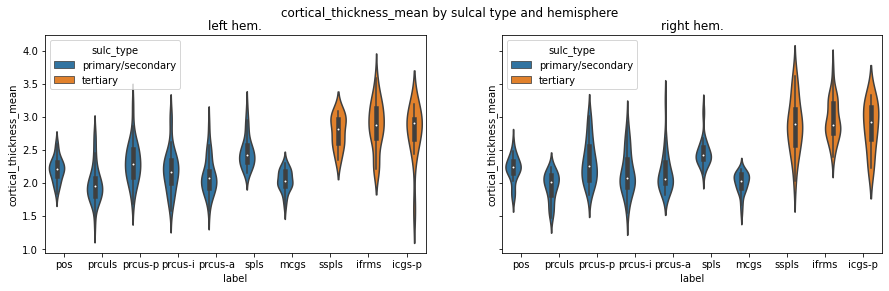

In [74]:
# plot mean sulcal cortical thickness (in mm)
violinplot(df, 'cortical_thickness_mean', 'sulcal cortical thickness')

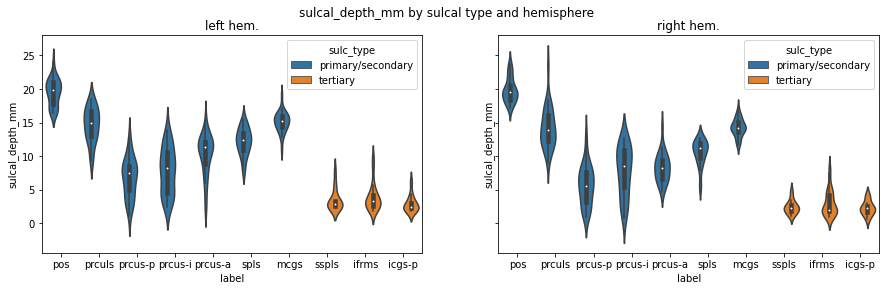

In [75]:
# plot mean sulcal depth (in mm)
violinplot(df, 'sulcal_depth_mm', 'sulcal depth')

It looks like tertiary sulci are both thicker and less deep than primary & secondary sulci. Let's confirm that:

In [97]:
## setup rpy2 ##
# run once; this will allow you to run R embedded in your Python notebook
%load_ext rpy2.ipython


The rpy2.ipython extension is already loaded. To reload it, use:
  %reload_ext rpy2.ipython


In [98]:
## import robjects ##
import tzlocal
import rpy2.robjects 
from rpy2.robjects import r

In [99]:
#### import rpackages ####

# import rpy2's package module
import rpy2.robjects.packages as rpackages

# import R's utility package
utils = rpackages.importr('utils')

# select a mirror for R packages
utils.chooseCRANmirror(ind=1) # select the first mirror in the list

rpy2.rinterface.NULL

In [102]:
%%R 
#^ runs R

# load packages
library(nlme)

# load data in R
df = read.csv('demo-30CN_MPC.csv')

# run models
model_CT <- lme(cortical_thickness_mean ~ hemi * sulc_type, random = ~ 1|sub/hemi/sulc_type,
               data = df)
model_CT.aov <- anova(model_CT)
cat('Cortical Thickness ANOVA:\n')
print(model_CT.aov)

model_SD <- lme(sulcal_depth_mm ~ hemi * sulc_type, random = ~ 1|sub/hemi/sulc_type,
               data = df)
model_SD.aov <- anova(model_SD)
cat('\nSulcal Depth ANOVA:\n')
print(model_SD.aov)

Cortical Thickness ANOVA:
               numDF denDF  F-value p-value
(Intercept)        1   469 9398.658  <.0001
hemi               1    29    0.698  0.4103
sulc_type          1    58  530.281  <.0001
hemi:sulc_type     1    58    2.133  0.1496

Sulcal Depth ANOVA:
               numDF denDF   F-value p-value
(Intercept)        1   469 3064.8245  <.0001
hemi               1    29    5.2709  0.0291
sulc_type          1    58  366.9125  <.0001
hemi:sulc_type     1    58    0.0398  0.8426


# Resources:

1. FreeSurfer wiki: https://surfer.nmr.mgh.harvard.edu/fswiki
2. FreeSurfer tutorial slides used in this demo: https://surfer.nmr.mgh.harvard.edu/fswiki/Tutorials 
3. FreeSurfer tutorial: https://andysbrainbook.readthedocs.io/en/latest/FreeSurfer/FreeSurfer_Introduction.html

